In [77]:
import cudf
import cuml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
import umap.plot
import bokeh.plotting as bpl
from cuml.manifold.umap import UMAP as clUMAP
from cuml.cluster import KMeans as cuKM
from cuml.decomposition import PCA as cuPCA
%matplotlib inline

In [18]:
df = pd.read_csv('/home/lima/Projects/simulation/SingleSample/Samples/allCounts/countsMatrixWithCutOffZero.csv')

In [19]:
df = df.rename(columns = {"Unnamed: 0": "GeneID"})
df.iloc[ : , 1 : ] = np.log2(df.iloc[ : , 1 : ] + 1)

In [27]:
transposedDF = df.T
transposedDF = transposedDF.drop(['GeneID'])
transposedDF['SampleName'] = transposedDF.index

In [37]:
transposedDF

,0,1,2,3,4,5,6,7,8,9,...,57764,57765,57766,57767,57768,57769,57770,57771,57772,SampleName
PDX_10Veh,11.7351,3.23822,10.5851,8.18985,8.67745,6.39341,10.4864,11.0483,11.4359,11.9325,...,5.0857,0,5.7427,5.99962,3.54249,3.43922,4.35721,0,0,PDX_10Veh
PDX_12Veh,10.7836,6.81131,9.59755,9.16547,8.60392,9.16551,11.433,9.69657,10.5803,11.1316,...,4.94401,0,6.9054,8.82247,7.16333,6.55908,9.88891,7.43894,0,PDX_12Veh
PDX_13P3_40,12.3506,4.51845,10.7938,7.88494,7.62783,5.40671,10.6961,11.5272,11.4449,11.7035,...,6.14415,0,5.90263,5.62182,4.81006,2.77351,1.82525,2.48987,0,PDX_13P3_40
PDX_14P3_20,11.6863,3.15485,10.1212,6.96877,7.67099,6.81578,10.4873,11.2126,11.0818,11.6792,...,5.71214,0,6.45923,6.28579,3.51849,4.95364,0,2.8522,0,PDX_14P3_20
PDX_1P3_20,11.8992,2.57924,10.4817,7.81343,8.54995,6.10078,11.4558,12.2293,8.94988,10.8717,...,6.67099,0,6.48068,6.20184,2.98365,4.7069,5.28841,0,0,PDX_1P3_20
PDX_2P3_40,12.3599,2.24315,10.7477,7.76086,7.85157,6.80351,11.0009,11.2822,11.2443,11.2822,...,5.56455,0,5.84412,6.82374,1.95661,4.80563,2.19958,0,0,PDX_2P3_40
PDX_3P3_40,12.1107,1.67225,10.6076,7.61345,7.57032,5.98013,10.9266,11.5256,11.4696,11.8788,...,5.11498,0,5.51088,6.7233,0,4.71023,4.62357,0,0,PDX_3P3_40
PDX_4P3_20,12.4117,2.44394,11.0876,7.37886,7.80085,6.21106,11.1719,11.5024,11.1825,11.4213,...,6.76215,0,6.1933,6.58004,2.43455,4.28572,1.67788,0,0,PDX_4P3_20
PDX_5P3_40,12.6124,3.05193,10.8396,7.48998,7.60326,6.60799,10.6945,11.5749,11.4296,11.7204,...,5.80838,0,5.97922,6.34241,0.768438,3.44952,1.26584,0,0,PDX_5P3_40
PDX_6P3_20,12.0502,2.24147,10.6273,7.74714,8.15929,6.72786,10.7536,11.5751,11.1631,11.7896,...,4.9991,0,5.80091,7.01909,0,2.90734,3.64363,0,0,PDX_6P3_20


In [34]:
dfTarget = transposedDF.SampleName.tolist()

In [35]:
gdf = cudf.from_pandas(transposedDF)

In [36]:
gdf

,0,1,2,3,4,5,6,7,8,9,...,57764,57765,57766,57767,57768,57769,57770,57771,57772,SampleName
PDX_10Veh,11.735128,3.238223,10.585103,8.189854,8.677454,6.393410,10.486355,11.048341,11.435874,11.932514,...,5.085698,0.0,5.742698,5.999619,3.542485,3.439224,4.357208,0.000000,0.0,PDX_10Veh
PDX_12Veh,10.783556,6.811310,9.597549,9.165468,8.603916,9.165514,11.432992,9.696572,10.580304,11.131636,...,4.944007,0.0,6.905400,8.822469,7.163333,6.559084,9.888908,7.438942,0.0,PDX_12Veh
PDX_13P3_40,12.350640,4.518451,10.793776,7.884937,7.627831,5.406706,10.696109,11.527212,11.444914,11.703508,...,6.144149,0.0,5.902629,5.621822,4.810058,2.773514,1.825253,2.489870,0.0,PDX_13P3_40
PDX_14P3_20,11.686318,3.154855,10.121192,6.968766,7.670988,6.815779,10.487277,11.212570,11.081845,11.679156,...,5.712140,0.0,6.459231,6.285791,3.518495,4.953639,0.000000,2.852204,0.0,PDX_14P3_20
PDX_1P3_20,11.899174,2.579236,10.481659,7.813426,8.549953,6.100780,11.455842,12.229331,8.949880,10.871718,...,6.670989,0.0,6.480680,6.201840,2.983655,4.706896,5.288410,0.000000,0.0,PDX_1P3_20
PDX_2P3_40,12.359878,2.243151,10.747651,7.760863,7.851572,6.803515,11.000879,11.282244,11.244324,11.282157,...,5.564552,0.0,5.844116,6.823739,1.956610,4.805630,2.199580,0.000000,0.0,PDX_2P3_40
PDX_3P3_40,12.110660,1.672246,10.607573,7.613448,7.570322,5.980125,10.926619,11.525633,11.469596,11.878805,...,5.114980,0.0,5.510883,6.723305,0.000000,4.710232,4.623572,0.000000,0.0,PDX_3P3_40
PDX_4P3_20,12.411678,2.443942,11.087595,7.378861,7.800845,6.211062,11.171943,11.502399,11.182483,11.421306,...,6.762153,0.0,6.193300,6.580043,2.434547,4.285717,1.677883,0.000000,0.0,PDX_4P3_20
PDX_5P3_40,12.612364,3.051932,10.839594,7.489978,7.603263,6.607992,10.694458,11.574878,11.429628,11.720437,...,5.808385,0.0,5.979219,6.342411,0.768438,3.449519,1.265841,0.000000,0.0,PDX_5P3_40
PDX_6P3_20,12.050191,2.241472,10.627311,7.747142,8.159292,6.727858,10.753599,11.575056,11.163060,11.789591,...,4.999096,0.0,5.800906,7.019086,0.000000,2.907340,3.643635,0.000000,0.0,PDX_6P3_20


In [40]:
%%time
g_embedding = clUMAP(n_neighbors = 5, init = 'spectral').fit_transform(gdf.iloc[ : , 0 : 57772])

CPU times: user 1min 13s, sys: 518 ms, total: 1min 14s
Wall time: 1min 14s


In [66]:
g_embedding_numpy = g_embedding.to_pandas().values
embedding_df = pd.DataFrame(data = g_embedding_numpy, index = dfTarget)
embedding_df = embedding_df.rename(columns = {0: 'PC1', 1 : 'PC2'})
embedding_df['Samples'] = embedding_df.index
embedding_df

,PC1,PC2,Samples
PDX_10Veh,-6.143761,-0.831604,PDX_10Veh
PDX_12Veh,-5.202717,1.876847,PDX_12Veh
PDX_13P3_40,-8.654441,1.785050,PDX_13P3_40
PDX_14P3_20,-8.557610,0.920895,PDX_14P3_20
PDX_1P3_20,-9.694803,0.031698,PDX_1P3_20
PDX_2P3_40,-7.500834,2.624415,PDX_2P3_40
PDX_3P3_40,-7.449060,0.262763,PDX_3P3_40
PDX_4P3_20,-8.263823,2.599650,PDX_4P3_20
PDX_5P3_40,-7.579897,1.968165,PDX_5P3_40
PDX_6P3_20,-9.029792,0.332435,PDX_6P3_20


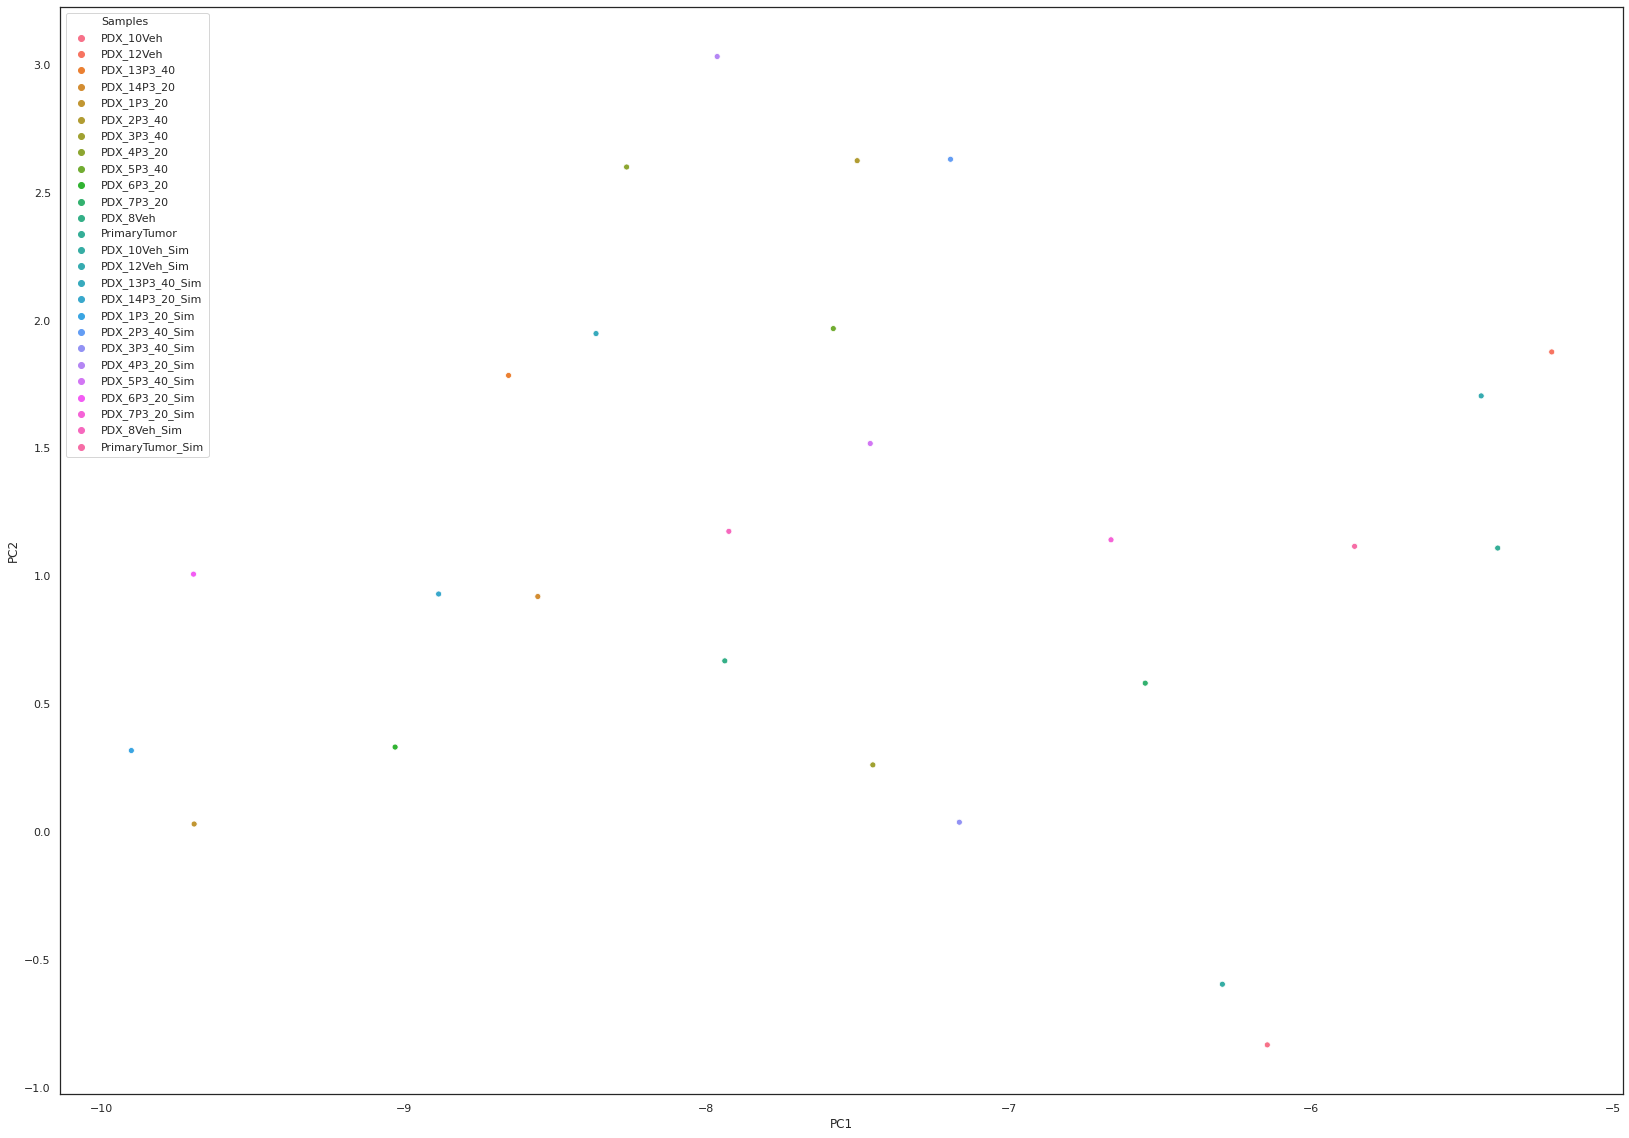

In [67]:
cmap = sns.cubehelix_palette(dark = 0.3, light = 0.8, as_cmap = True)
ax = sns.scatterplot(x = embedding_df.PC1, y = embedding_df.PC2, hue = embedding_df.Samples)

In [69]:
cdf = cudf.from_pandas(df)

In [73]:
km_cdf = cdf.drop(['GeneID'])
km_cdf

,PDX_10Veh,PDX_12Veh,PDX_13P3_40,PDX_14P3_20,PDX_1P3_20,PDX_2P3_40,PDX_3P3_40,PDX_4P3_20,PDX_5P3_40,PDX_6P3_20,...,PDX_14P3_20_Sim,PDX_1P3_20_Sim,PDX_2P3_40_Sim,PDX_3P3_40_Sim,PDX_4P3_20_Sim,PDX_5P3_40_Sim,PDX_6P3_20_Sim,PDX_7P3_20_Sim,PDX_8Veh_Sim,PrimaryTumor_Sim
0,11.735128,10.783556,12.350640,11.686318,11.899174,12.359878,12.110660,12.411678,12.612364,12.050191,...,11.743890,11.797699,12.305830,12.061844,12.386350,12.596071,12.028128,12.118346,12.347295,12.250251
1,3.238223,6.811310,4.518451,3.154855,2.579236,2.243151,1.672246,2.443942,3.051932,2.241472,...,3.300669,2.723066,1.679029,1.839371,3.057630,2.802131,2.349446,3.051684,3.673947,0.000000
2,10.585103,9.597549,10.793776,10.121192,10.481659,10.747651,10.607573,11.087595,10.839594,10.627311,...,10.248389,10.298632,10.641707,10.481958,11.039878,10.741139,10.484174,10.402547,10.556163,9.273519
3,8.189854,9.165468,7.884937,6.968766,7.813426,7.760863,7.613448,7.378861,7.489978,7.747142,...,7.131504,7.844402,7.669701,7.448310,7.435340,7.405422,7.681809,7.955358,7.730199,9.808684
4,8.677454,8.603916,7.627831,7.670988,8.549953,7.851572,7.570322,7.800845,7.603263,8.159292,...,7.420486,8.506794,7.587920,7.340163,7.700658,7.550216,8.073412,8.224643,7.509193,9.967960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57768,3.542485,7.163333,4.810058,3.518495,2.983655,1.956610,0.000000,2.434547,0.768438,0.000000,...,3.178320,3.182199,1.827349,0.000000,2.780342,0.000000,0.000000,1.426476,1.433927,1.794994
57769,3.439224,6.559084,2.773514,4.953639,4.706896,4.805630,4.710232,4.285717,3.449519,2.907340,...,4.838414,4.645458,4.938193,4.713265,3.681927,3.104858,2.218448,2.609085,3.255330,5.649847
57770,4.357208,9.888908,1.825253,0.000000,5.288410,2.199580,4.623572,1.677883,1.265841,3.643635,...,0.790042,5.103496,1.539538,4.948304,1.203116,1.173282,4.086376,3.856115,2.608815,7.249134
57771,0.000000,7.438942,2.489870,2.852204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.580802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.103937,0.000000,0.000000


In [78]:
pca = cuPCA(n_components = 2, svd_solver = 'full', whiten = False, random_state = 42)

In [79]:
%%time
output_pca = pca.fit_transform(km_cdf)

CPU times: user 243 ms, sys: 91.8 ms, total: 334 ms
Wall time: 487 ms


In [80]:
%%time
kmeans = cuKM(init = 'k-means||', n_clusters = 26, random_state = 42)
kmeans.fit(output_pca)

CPU times: user 382 ms, sys: 11.6 ms, total: 393 ms
Wall time: 391 ms


KMeans(handle=<cuml.common.handle.Handle object at 0x7faafe466cf0>, n_clusters=26, max_iter=300, tol=0.0001, verbose=0, random_state=42, init='k-means||', n_init=1, oversampling_factor=2.0, max_samples_per_batch=32768, output_type='cudf')

In [83]:
output_pca = output_pca.rename(columns = {0: 'PC1', 1: 'PC2'})

In [81]:
y_kmeans = kmeans.predict(output_pca)

In [84]:
output_pca['Predict'] = y_kmeans
output_pca

,PC1,PC2,Predict
0,44.928898,-0.802984,15
1,-1.743217,1.161600,6
2,36.634526,-1.412484,11
3,23.839416,1.669648,8
4,24.673778,0.582092,8
...,...,...,...
57768,-4.803396,3.122483,24
57769,4.224707,1.931543,6
57770,1.410428,7.691065,4
57771,-11.988185,4.969154,17


In [99]:
pd_pca = output_pca.to_pandas().values

In [100]:
pd_pca = pd.DataFrame(pd_pca, columns = ['PC1', 'PC2', 'Predict'])

In [101]:
pd_pca

,PC1,PC2,Predict
0,44.928898,-0.802984,15.0
1,-1.743217,1.161600,6.0
2,36.634526,-1.412484,11.0
3,23.839416,1.669648,8.0
4,24.673778,0.582092,8.0
...,...,...,...
57768,-4.803396,3.122483,24.0
57769,4.224707,1.931543,6.0
57770,1.410428,7.691065,4.0
57771,-11.988185,4.969154,17.0


In [96]:
type(pd_pca)

pandas.core.frame.DataFrame

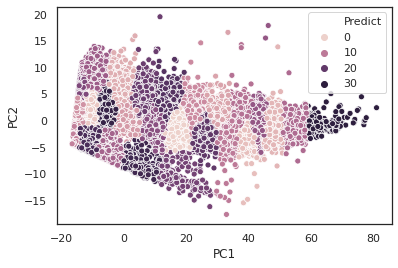

In [102]:
cmap = sns.cubehelix_palette(dark = 1.0, light = 0.8, as_cmap = True)
ax = sns.scatterplot(x = pd_pca.PC1, y = pd_pca.PC2, hue = pd_pca.Predict)

[]

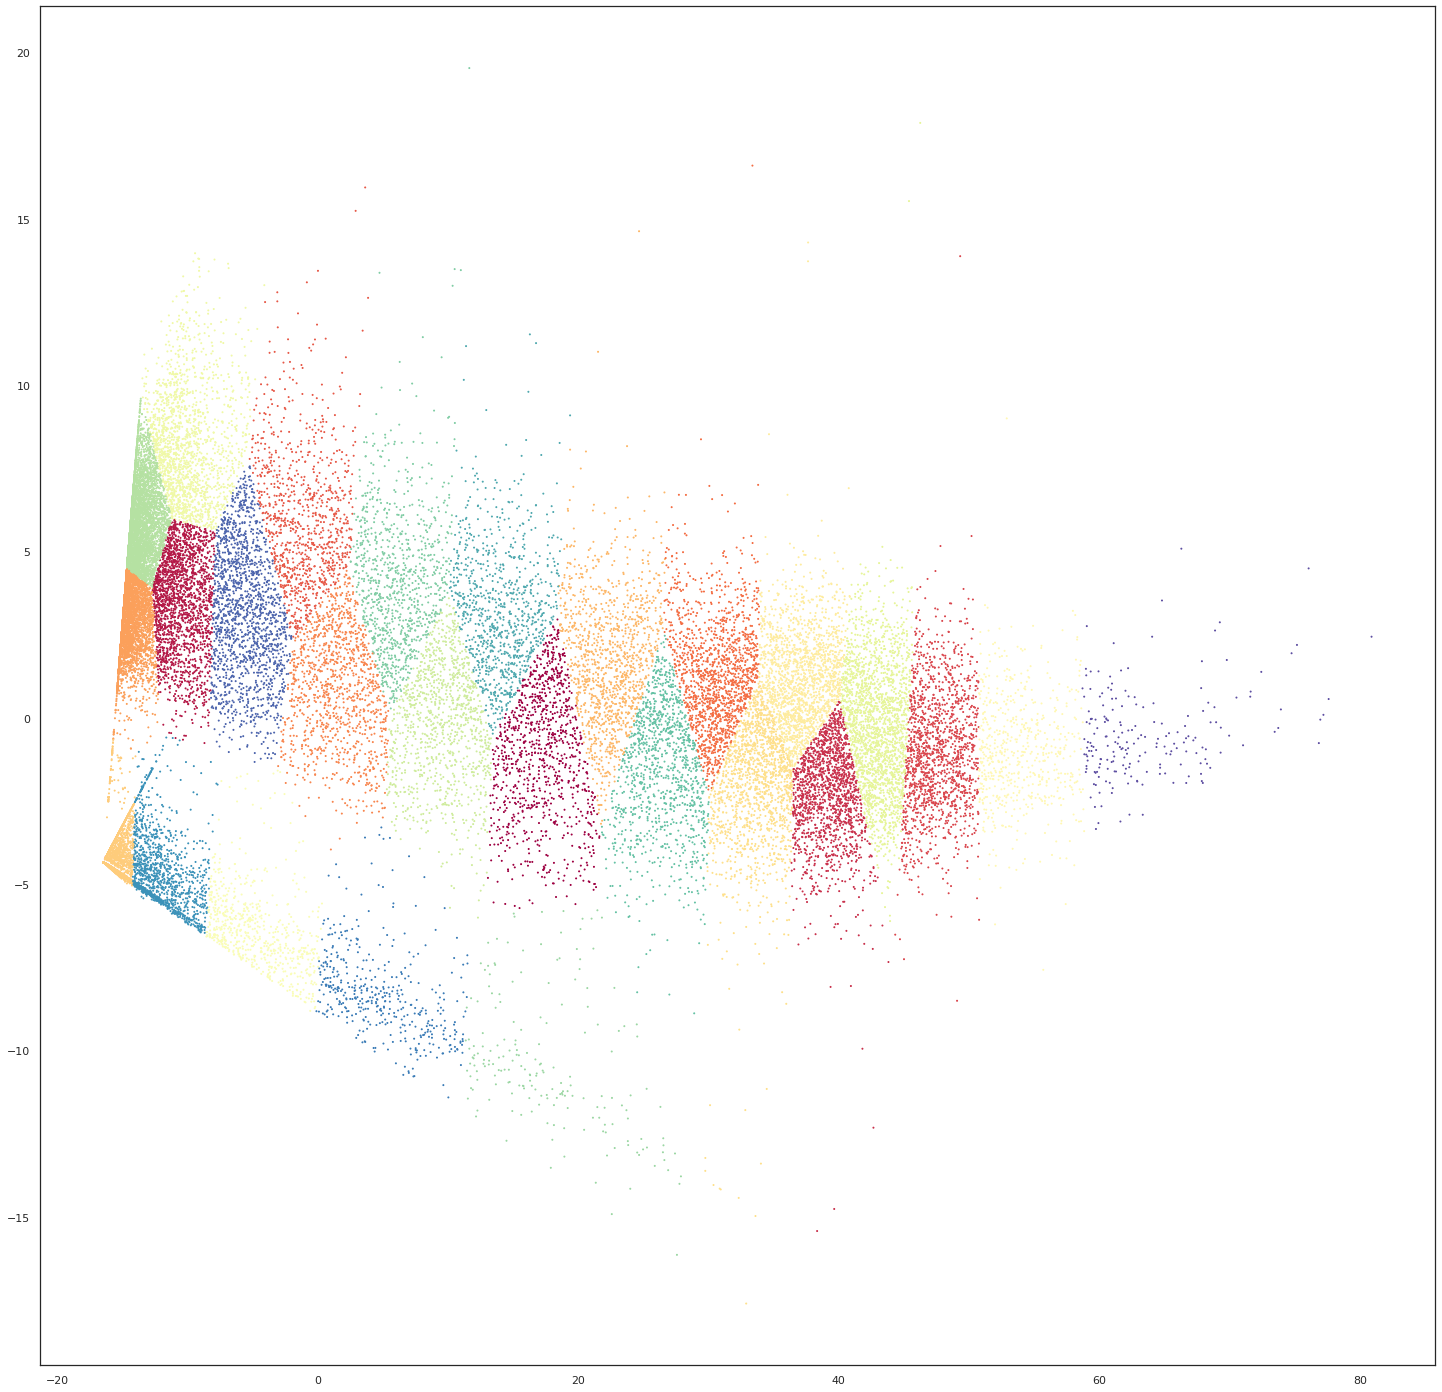

In [109]:
plt.figure(figsize = (25, 25))
plt.scatter(pd_pca.PC1, pd_pca.PC2, c = pd_pca.Predict, s = 1, cmap = 'Spectral')
plt.plot()